<a href="https://colab.research.google.com/github/komalsursawant029/Play_Store_Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from folium.plugins import HeatMap
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/alma_hotel_booking_analysis/Hotel Bookings.csv')

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#Data cleaning

In [ ]:
df.index


RangeIndex(start=0, stop=119390, step=1)

In [ ]:
df.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Now lets check how many cells are missing from our dataset.

In [ ]:
df.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.isnull().sum()/len(df.index)*100


hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

We can see the null values through heat map also

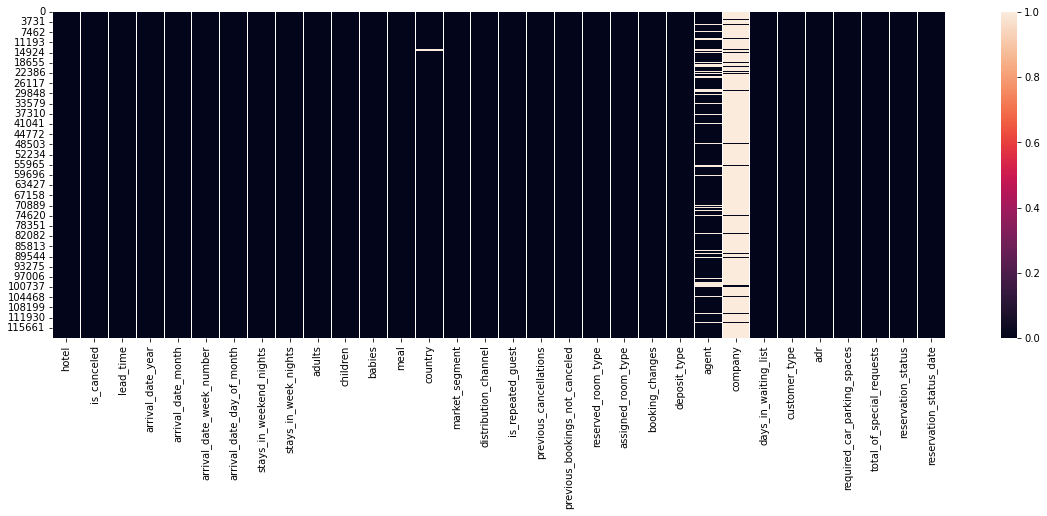

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(df.isnull())


In [ ]:
df.drop('company', inplace=False, axis=1)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
df=df.drop(['agent','company'],axis=1)


In [ ]:
df = df.dropna(axis = 0)


In [ ]:
df = df.drop(labels='days_in_waiting_list', axis=1)


In [ ]:
df.isnull().sum() # Now we don't have any missing values


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [ ]:
df.dtypes


hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
customer_type                     

In [ ]:
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,5400.000000,8.000000,5.000000


#Canceled

In [ ]:
print('Total Bookings cancelled')
print(df.is_canceled.value_counts())
print('Cancelation percentage')
print(df.is_canceled.value_counts(normalize=True))

Total Bookings cancelled
0    74745
1    44153
Name: is_canceled, dtype: int64
Cancelation percentage
0    0.628648
1    0.371352
Name: is_canceled, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


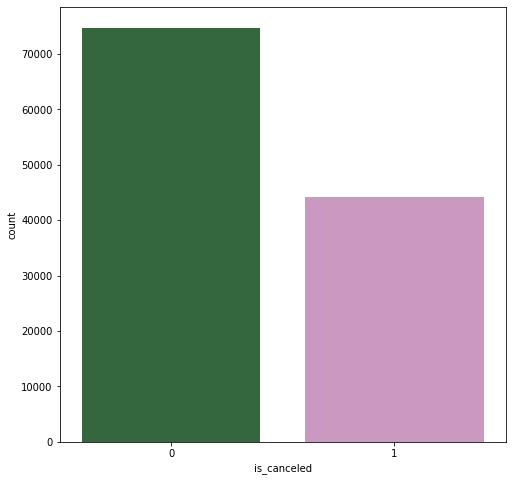

In [ ]:
#Canceled=1, Not canceled= 0
plt.figure(figsize=(8,8))
sns.countplot(df['is_canceled'], palette='cubehelix')
plt.show()

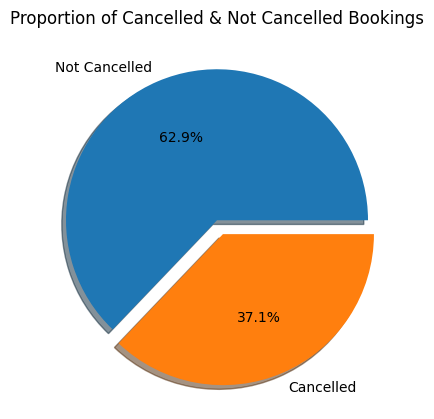

In [ ]:
df['is_canceled'].value_counts(normalize = True)

plt.figure(figsize=(7,5), dpi=100)
proportion = df['is_canceled'].value_counts()
explode=[0,0.1]

labels = ['Not Cancelled','Cancelled']
plt.title('Proportion of Cancelled & Not Cancelled Bookings')
plt.pie(proportion, labels=labels, shadow = True, autopct = '%1.1f%%',explode=explode)
plt.show()

Bookings got canceled 37% of the time. While booking guest did checkd-in (did not cancel the booking ) almost 63% of the time.

#Year

Now, find the year in which most booked hotel.

In [ ]:
df_not_canceled = df[df['is_canceled'] == 0]


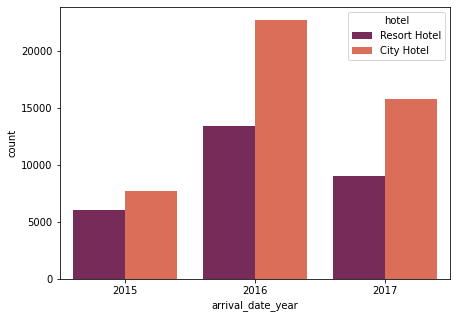

In [ ]:

plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled,palette="rocket");



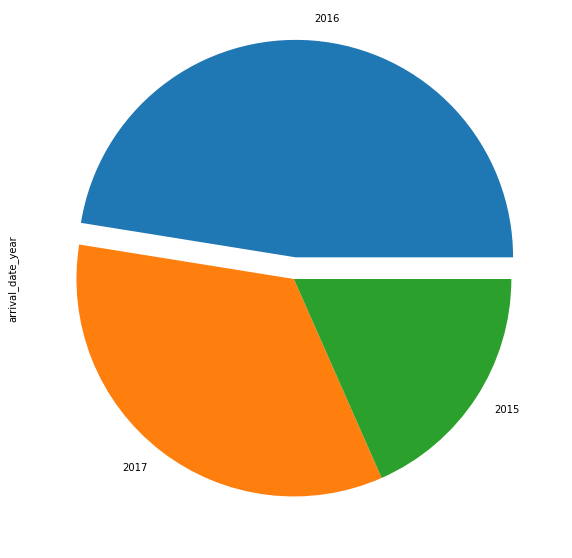

In [ ]:
plt.figure(figsize=(20,10))
explode=[0.1,0,0]
df.arrival_date_year.value_counts(normalize=True).plot(kind="pie",explode=explode)

plt.show()

More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% the next year.

#arrival_date_MONTH

In [ ]:
df1 = df.copy()
df1['hotel'].value_counts()

City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64

In [ ]:
df1['arrival_date_month'].value_counts()

August       13852
July         12628
May          11779
October      11095
April        11045
June         10927
September    10467
March         9739
February      8012
November      6752
December      6728
January       5874
Name: arrival_date_month, dtype: int64

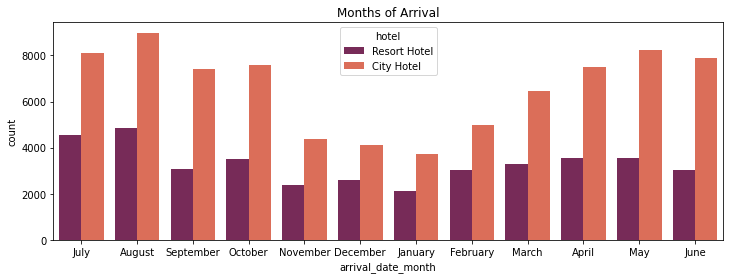

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='arrival_date_month', hue = 'hotel', data= df1,palette='rocket')
plt.title('Months of Arrival')
plt.show()

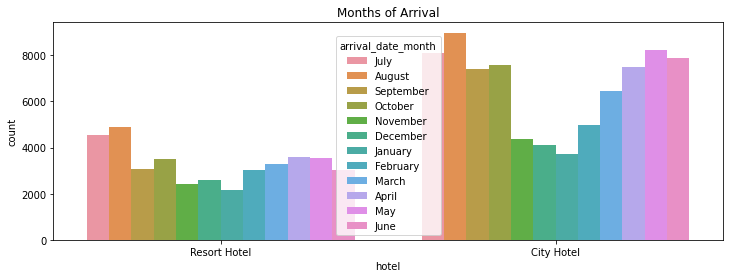

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(hue='arrival_date_month', x = 'hotel', data= df1)
plt.title('Months of Arrival')
plt.show()

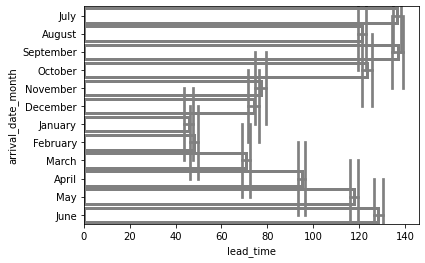

In [ ]:
sns.barplot(data=df,x='lead_time',y='arrival_date_month',capsize=4, errcolor=".5",linewidth=3,edgecolor=".5",facecolor=(0,0,0,0),)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


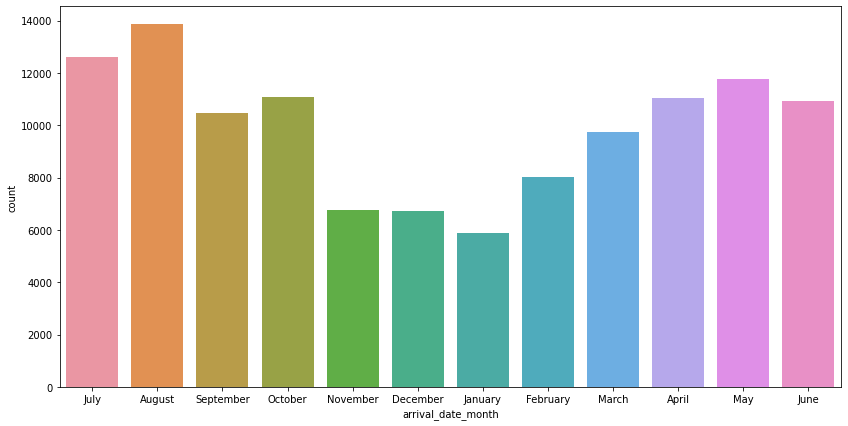

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['arrival_date_month'])
plt.show()


As we can see most bookings were made from July to August. And the least bookings were made at the start and end of the year.

#How does the Price Per Night (ADR) Vary Over the Year by Hotel Type

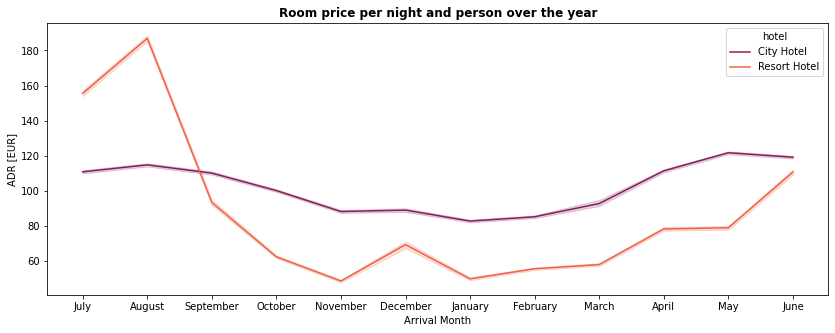

In [ ]:
plt.figure(figsize=(14,5))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=df,
             hue_order = ["City Hotel", "Resort Hotel"],palette= 'rocket')

plt.title("Room price per night and person over the year", weight = 'bold')
plt.xlabel("Arrival Month")
plt.ylabel("ADR [EUR]")
plt.show()

For Resort Hotel, the price per night (ADR) is more expensive during July, August & September For City Hotel, the price per night (ADR) is slightly more during March, April & May

#categories

Text(0.5, 1.0, 'Number of adults')

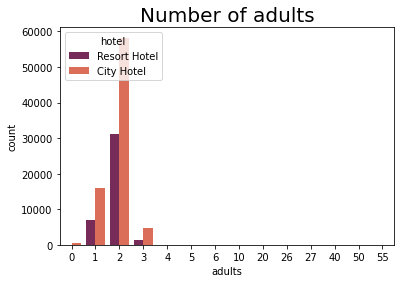

In [ ]:
#Graphing data by types of visitors
sns.countplot( data = df, x= 'adults', hue = 'hotel',palette='rocket').set_title("Number of adults", fontsize = 20)

Text(0.5, 1.0, 'Number of children')

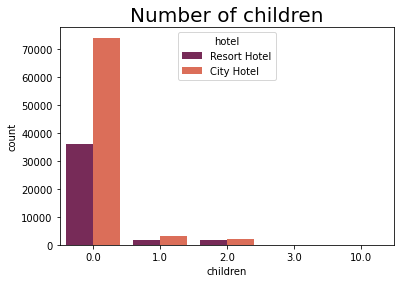

In [ ]:
sns.countplot(data = df, x = 'children', hue = 'hotel',palette='rocket').set_title("Number of children", fontsize = 20)

Text(0.5, 1.0, 'Number of babies')

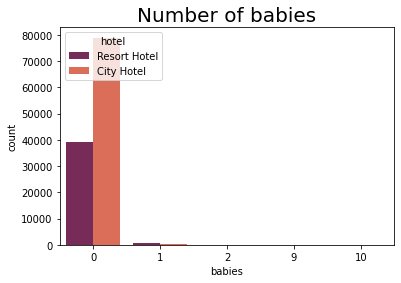

In [ ]:
sns.countplot(data = df, x = 'babies', hue = 'hotel',palette='rocket').set_title("Number of babies", fontsize = 20 )


#meal

In [ ]:
df.meal.value_counts(normalize=True)



BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: meal, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


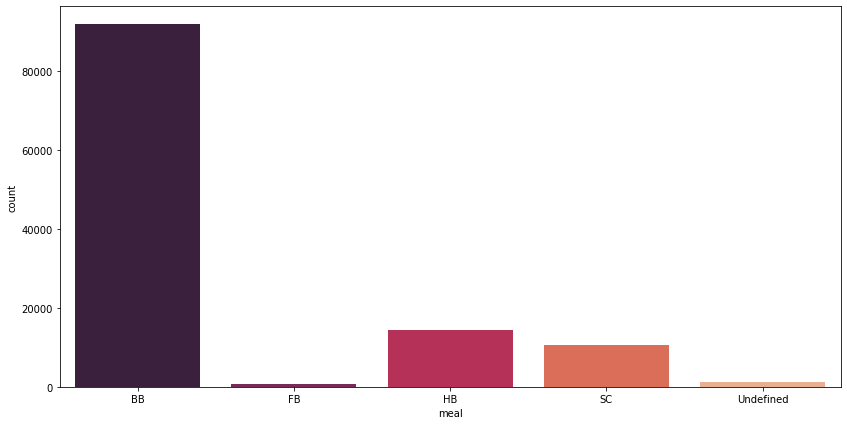

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['meal'], palette='rocket')
plt.show()

#Plotting the bar plot of top 10 countries.

In [ ]:
top10 = df[df['country'].isin(["PRT","GBR","FRA","ESP","DEU","ITA","IRL",
                         "BEL","BRA","NLD"])]

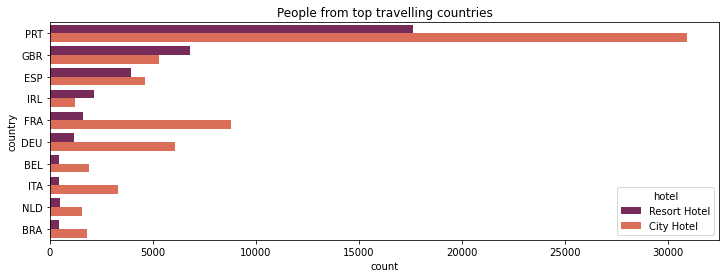

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(y='country', hue = 'hotel', data= top10,palette='rocket')
plt.title('People from top travelling countries')
plt.show()

#market segment

In [ ]:
# total bookings per market segment (incl. canceled)
segments=df["market_segment"].value_counts()

# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per market segment" )
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

#Distribution Channel

In [ ]:
df.distribution_channel.value_counts(normalize=True)



TA/TO        0.821965
Direct       0.121810
Corporate    0.054593
GDS          0.001623
Undefined    0.000008
Name: distribution_channel, dtype: float64

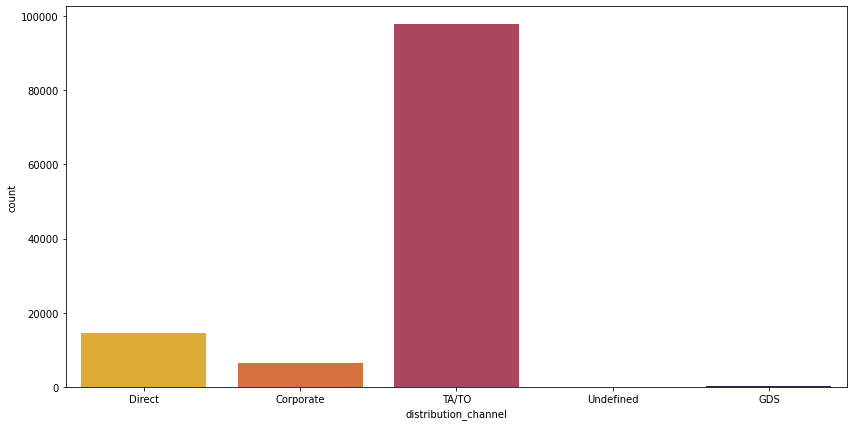

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x=df['distribution_channel'], palette='inferno_r')
plt.show()

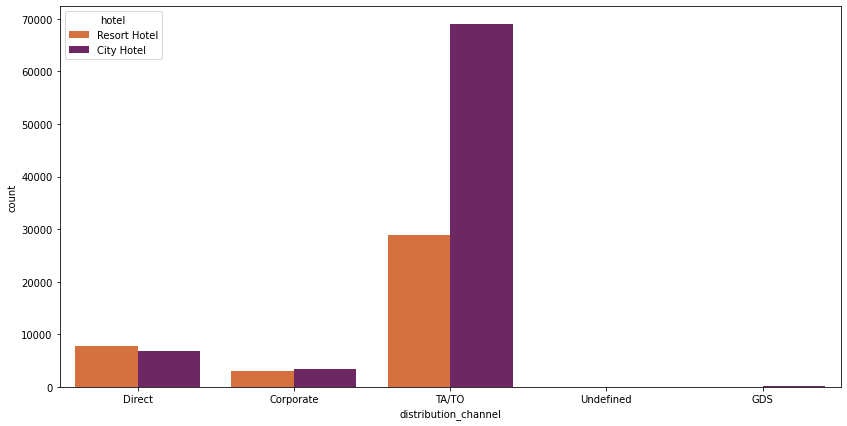

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(data=df,x=df['distribution_channel'],hue='hotel', palette='inferno_r')
plt.show()

#Repeated Guest

In [ ]:
df.is_repeated_guest.value_counts(normalize=True)


0    0.967989
1    0.032011
Name: is_repeated_guest, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



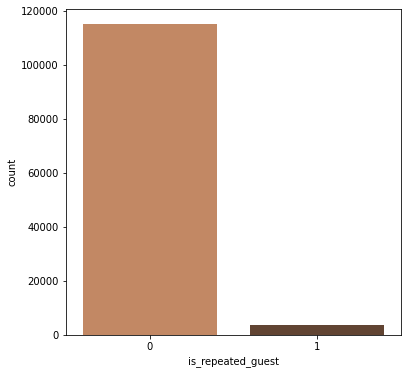

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['is_repeated_guest'], palette='copper_r')
plt.show()

#Reserved Room type

In [ ]:
df.reserved_room_type.value_counts(normalize=True)



A    0.719953
D    0.161256
E    0.054643
F    0.024307
G    0.017519
B    0.009369
C    0.007830
H    0.005055
L    0.000050
P    0.000017
Name: reserved_room_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



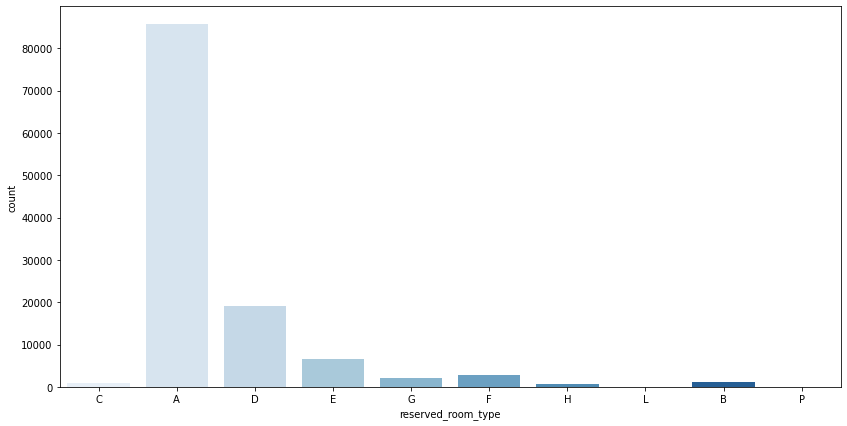

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['reserved_room_type'], palette="Blues")
plt.show()

In [ ]:
data = df[df['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

#Assigned Room type

In [ ]:
df.assigned_room_type.value_counts(normalize=True)


A    0.621230
D    0.211660
E    0.065081
F    0.031388
G    0.021354
C    0.019798
B    0.018158
H    0.005955
I    0.003003
K    0.002347
P    0.000017
L    0.000008
Name: assigned_room_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



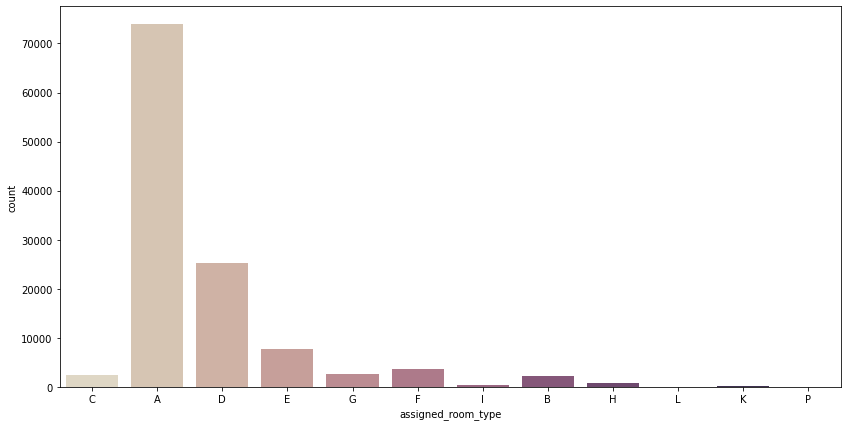

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['assigned_room_type'], palette='ch:s=-.2,r=.6')
plt.show()

#Booking Changes

In [ ]:
df.booking_changes.value_counts(normalize=True)


0     0.848643
1     0.106301
2     0.031876
3     0.007780
4     0.003154
5     0.000992
6     0.000530
7     0.000261
8     0.000143
9     0.000067
10    0.000050
13    0.000042
14    0.000042
15    0.000025
16    0.000017
17    0.000017
12    0.000017
11    0.000017
20    0.000008
21    0.000008
18    0.000008
Name: booking_changes, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



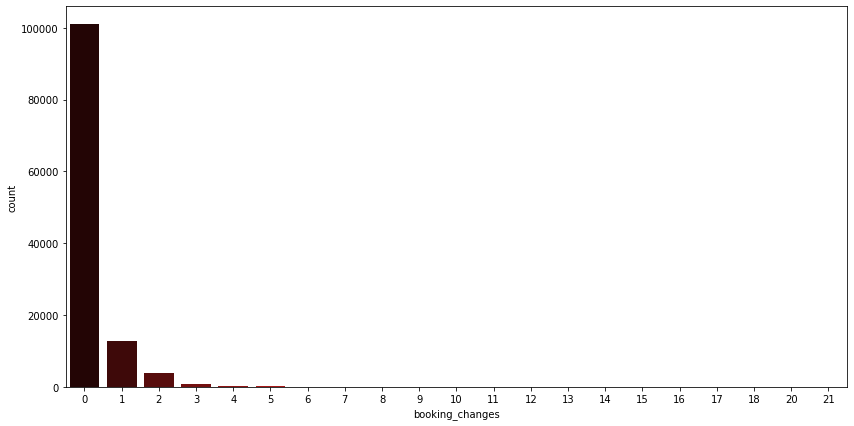

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['booking_changes'], palette='hot')
plt.show()

#Lead time

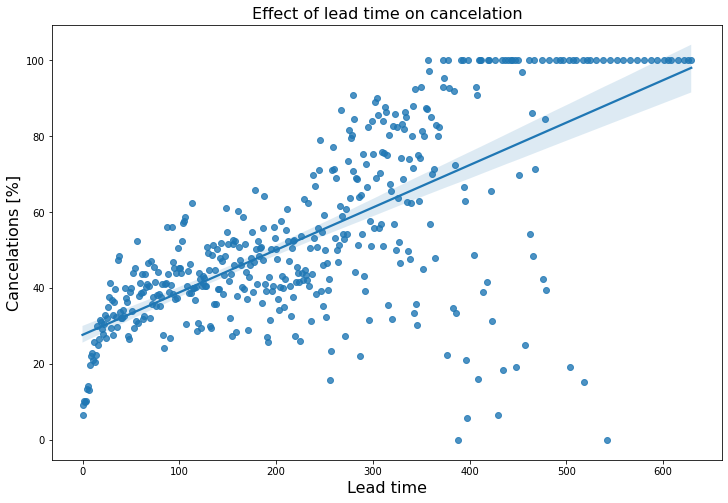

In [ ]:
lead_cancel_data = df.groupby("lead_time")["is_canceled"].describe()
# use only lead_times wih more than 10 bookings for graph:
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,365)
plt.show()

Bookings made a few days before the arrival date are rarely canceled, whereas bookings made over one year in advance are canceled very often.

#Deposit Type

In [ ]:
df.deposit_type.value_counts(normalize=True)


No Deposit    0.876070
Non Refund    0.122567
Refundable    0.001363
Name: deposit_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



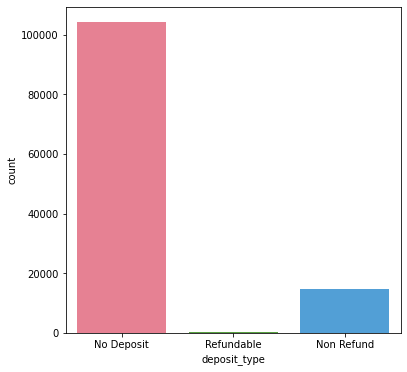

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['deposit_type'], palette='husl')
plt.show()

#Customer Type

In [ ]:
df.customer_type.value_counts(normalize=True)


Transient          0.750004
Transient-Party    0.210920
Contract           0.034281
Group              0.004794
Name: customer_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



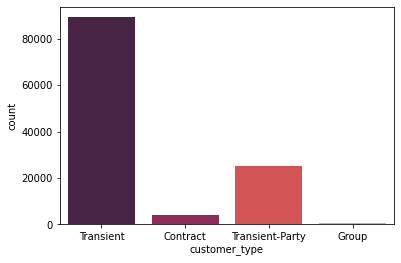

In [ ]:
sns.countplot(df['customer_type'], palette='rocket')
plt.show()

#Required Car Parking Spaces

In [ ]:
df.required_car_parking_spaces.value_counts(normalize=True)


0    0.938519
1    0.061204
2    0.000235
3    0.000025
8    0.000017
Name: required_car_parking_spaces, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



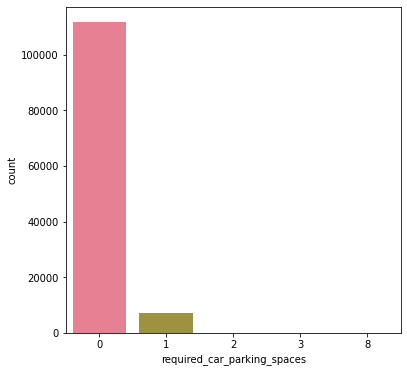

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['required_car_parking_spaces'], palette='husl')
plt.show()

#Reservation Status

In [ ]:
df.reservation_status.value_counts(normalize=True)


Check-Out    0.628648
Canceled     0.361234
No-Show      0.010118
Name: reservation_status, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



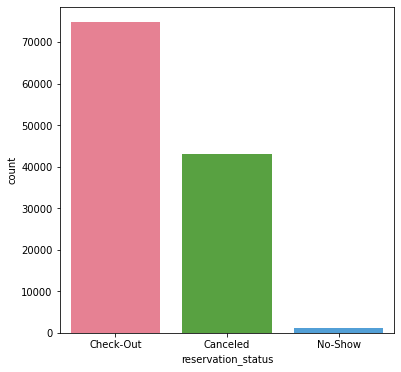

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['reservation_status'], palette='husl')
plt.show()


Almost 35% of bookings were canceled.More than 60% of the population booked the City hotel.More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% next year.Most bookings were made from July to August. And the least bookings were made at the start and end of the year.Portugal, the UK, and France, Spain and Germany are the top countries from most guests come, more than 80% come from these 5 countries.Most people stay for one, two, or three. For Resort hotel, the most popular stay duration is three, two, one, and four days respectively.For City hotel, most popular stay duration is one, two, seven(week), and three respectivelyCouple (or 2 adults) is the most popular accommodation type. So hotels can make arrangement plans accordingly